In [20]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import DarkNews as dn

# Our module
import nuflux

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
#Circular detector (R = 10 km = 10 000 m = 1 000 000 cm) with 1 TeV max energy and 380 GeV average energy (arbitrary); shoudl output some acceptance
Radius = 3e5/2/np.pi
Detector_height = 1.1e3
Dimensions_detector = [6e2, 3]

mdb = nuflux.fluxMC.MuonDecay()

df = mdb.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = 3e3,  #maximum momentum
                            beam_p0 = 1e3, # average momentum (GeV)
                            beam_dpop = 0.1,# little beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )

_= mdb.propagate_to_detector(
                            Racc = Radius,
                            circular = True,
                            det_height = Detector_height, #10 m in cm
                            Ddetector =Dimensions_detector) #arbitrary dimensions for circ detect SHEET at x = 0, y=0, z = Racc ; [0] is radius of detector and [1] is the hollow hole in the middle 
_ = mdb.flux_in_detector(circular = True, NBINS=50)

print("If decay uniform, then acceptance = {}".format(1 / 2 /np.pi * np.arccos(Radius / (Radius + Dimensions_detector[0]))))

187522
Detector acceptance: 2.27e-02 for nue and 2.27e-02 for numu
If decay uniform, then acceptance = 0.025100275316020777


[0.00226192 0.00155797 0.00424039 ... 0.00369723 0.00405717 0.00994931]


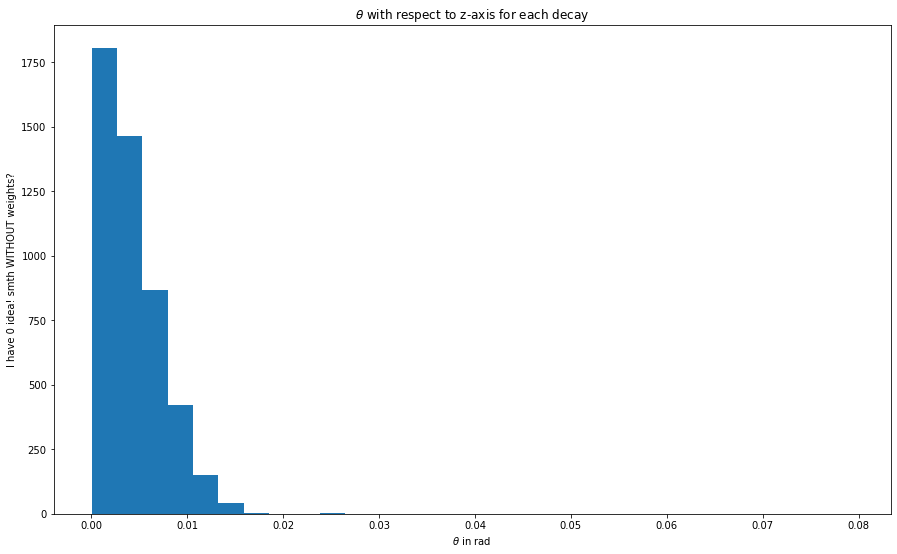

<Figure size 432x288 with 0 Axes>

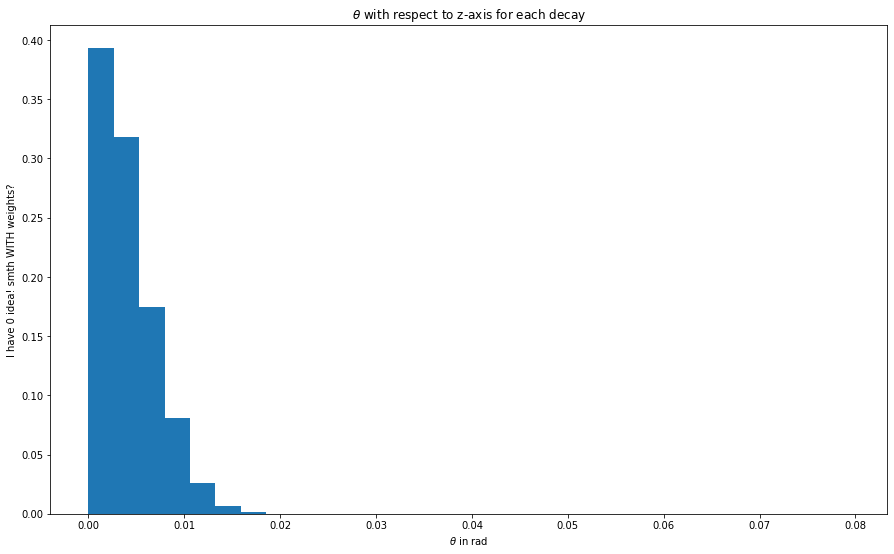

In [11]:
# Thetas from tangent axis
plt.figure(figsize = (15,9))
plt.hist(np.arccos(dn.Cfourvec.get_cosTheta(mdb.pnumu[mdb.mask_numu])), bins = 30)
plt.title(r"$\theta$ with respect to z-axis for each decay")
plt.xlabel(r"$\theta$ in rad")
plt.ylabel("I have 0 idea! smth WITHOUT weights?")
plt.figure(2)
plt.figure(figsize = (15,9))
plt.hist(np.arccos(dn.Cfourvec.get_cosTheta(mdb.pnumu[mdb.mask_numu])), bins = 30, weights = mdb.wnumu_ND / sum(mdb.wnumu_ND))
plt.title(r"$\theta$ with respect to z-axis for each decay")
plt.xlabel(r"$\theta$ in rad")
plt.ylabel("I have 0 idea! smth WITH weights?")
print(np.arccos(dn.Cfourvec.get_cosTheta(mdb.pnumu[mdb.mask_numu])))

In [ ]:
mdb.heights[:,2][mdb.mask_nue]

/tmp/ipykernel_22212/4266850721.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(mdb.heights[:,1])[mdb.mask_numu], bins = 100, weights = mdb.wnumu_ND/sum(mdb.wnumu_ND), range=(2.950, 3.05))
/tmp/ipykernel_22212/4266850721.py:19: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(mdb.heights[:,2])[mdb.mask_nue], bins=100, weights = mdb.wnue_ND/sum(mdb.wnumu_ND), range=(2.950,3.05))


Text(0, 0.5, 'I have 0 idea! smth WITH weights?')

<Figure size 432x288 with 0 Axes>

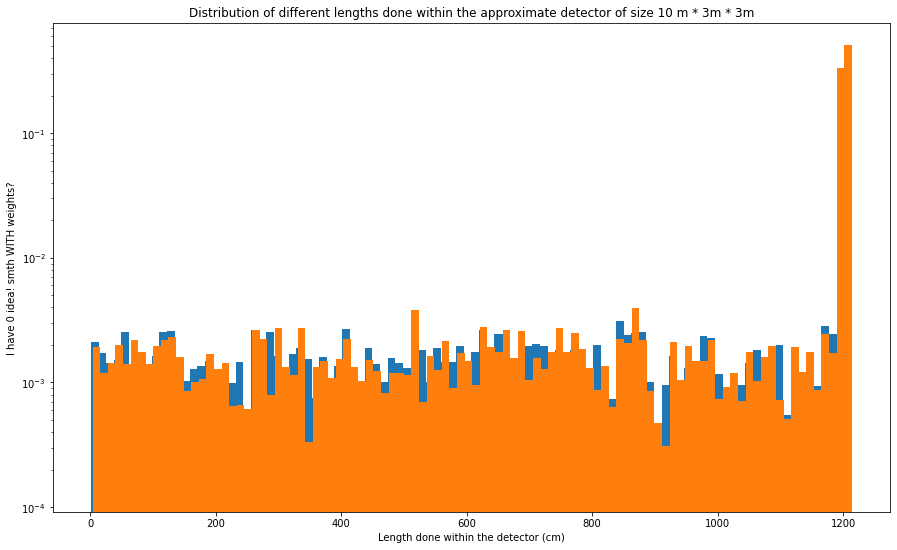

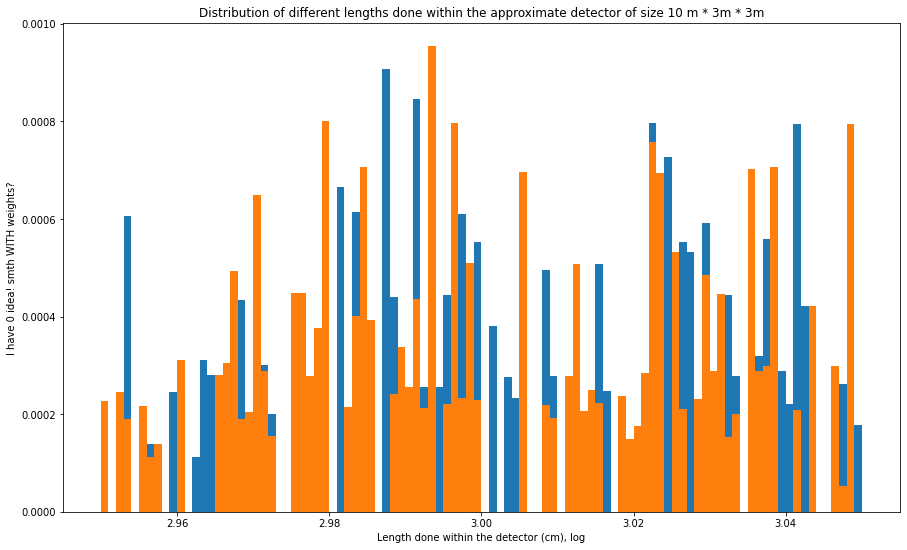

In [12]:
#weights? self.wnumu_ND and self.wnue_ND (already masked), maybe multiply by self.N_mu = 1e18?
#plt.figure(figsize = (15,9))
#plt.hist(np.log10(mdb.heights[:,1])[mdb.mask_numu], bins = 100)
#plt.hist(mdb.heights[:,2][mdb.mask_nue], bins=100)
#plt.title("Distribution of different lengths done within the approximate detector of size 10 m * 3m * 3m")
#plt.xlabel("Length done within the detector (cm)")
#plt.ylabel("I have 0 idea! smth WITHOUT weights?")
plt.figure(1)
plt.figure(figsize = (15,9))
plt.hist(mdb.heights[:,1][mdb.mask_numu], bins = 100, weights = mdb.wnumu_ND/sum(mdb.wnumu_ND))
plt.hist(mdb.heights[:,2][mdb.mask_nue], bins=100, weights = mdb.wnue_ND/sum(mdb.wnumu_ND))
plt.title("Distribution of different lengths done within the approximate detector of size 10 m * 3m * 3m")
plt.xlabel("Length done within the detector (cm)")
plt.ylabel("I have 0 idea! smth WITH weights?")
plt.yscale("log")
plt.figure(2)
plt.figure(figsize = (15,9))
plt.hist(np.log10(mdb.heights[:,1])[mdb.mask_numu], bins = 100, weights = mdb.wnumu_ND/sum(mdb.wnumu_ND), range=(2.950, 3.05))
plt.hist(np.log10(mdb.heights[:,2])[mdb.mask_nue], bins=100, weights = mdb.wnue_ND/sum(mdb.wnumu_ND), range=(2.950,3.05))
plt.title("Distribution of different lengths done within the approximate detector of size 10 m * 3m * 3m")
plt.xlabel("Length done within the detector (cm), log")
plt.ylabel("I have 0 idea! smth WITH weights?")

Spread: 0.02818530717958634, Expected: 0.024504422698000385


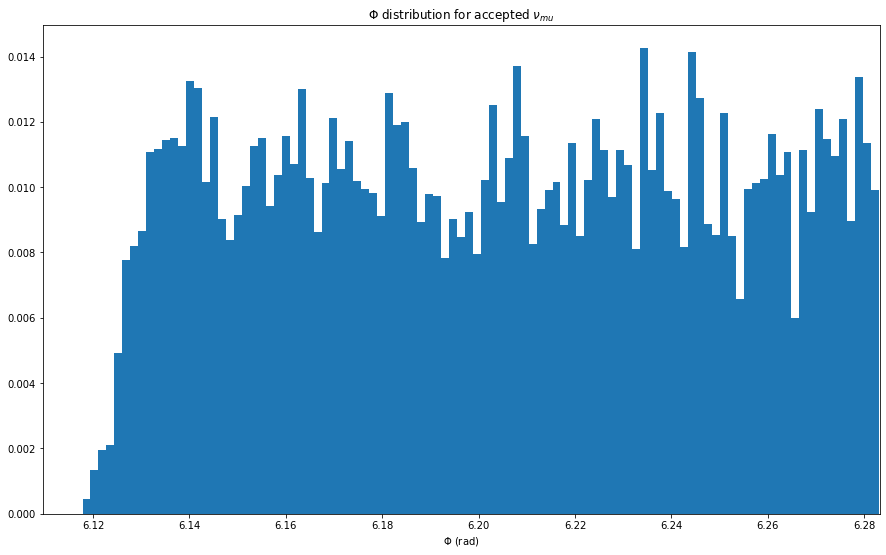

In [13]:
plt.figure(figsize = (15,9))
plt.hist(mdb.delta[mdb.mask_numu], bins = 100, weights = mdb.wnumu_ND/sum(mdb.wnumu_ND))
plt.xlim(right=2*np.pi)
plt.title(r"$\Phi$ distribution for accepted $\nu_{mu}$")
plt.xlabel(r"$\Phi$ (rad)")
print("Spread: {}, Expected: {}".format(2*np.pi - 6.255, 0.0039*2*np.pi))

(array([ 734.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4025.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

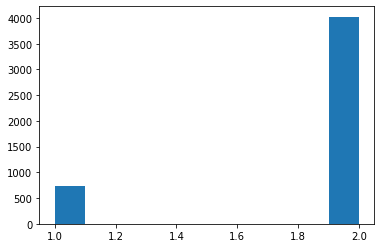

In [14]:
plt.hist(mdb.cases[:,1][mdb.mask_numu])

Text(0.5, 1.0, 'Decay positions on detector with detector shown')

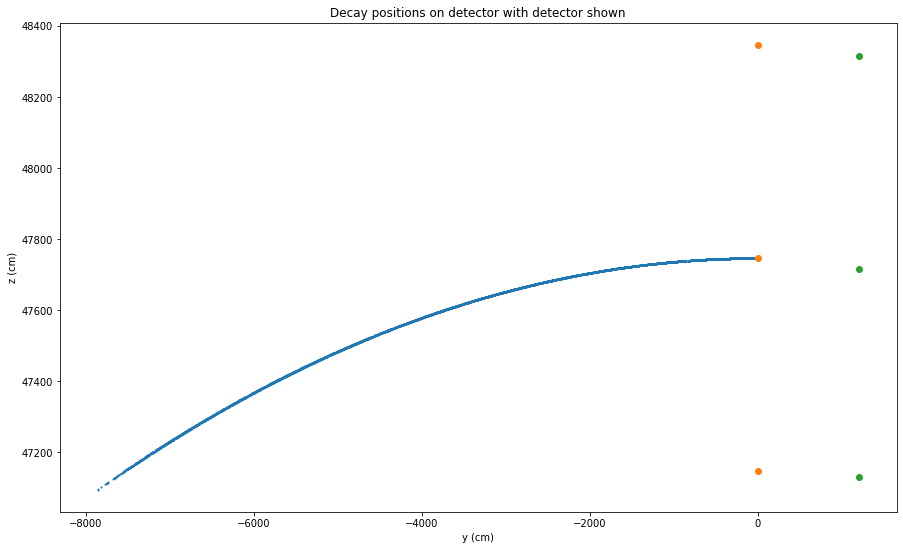

In [17]:
plt.figure(figsize=(15,9))
h = Radius - np.sqrt(Radius**2 - Detector_height**2)
plt.scatter(mdb.pos_at[1,:][mdb.mask_numu], mdb.pos_at[2,:][mdb.mask_numu], s=1)
plt.scatter([0, 0, 0], [Radius + Dimensions_detector[0], Radius, Radius-Dimensions_detector[0]])
plt.scatter([Detector_height, Detector_height, Detector_height], [Radius + Dimensions_detector[0]-h, Radius-h, Radius-Dimensions_detector[0]]-h)
plt.xlabel("y (cm)")
plt.ylabel("z (cm)")
plt.title("Decay positions on detector with detector shown")

Text(0.5, 1.0, 'Decay positions on detector with detector shown and interaction points')

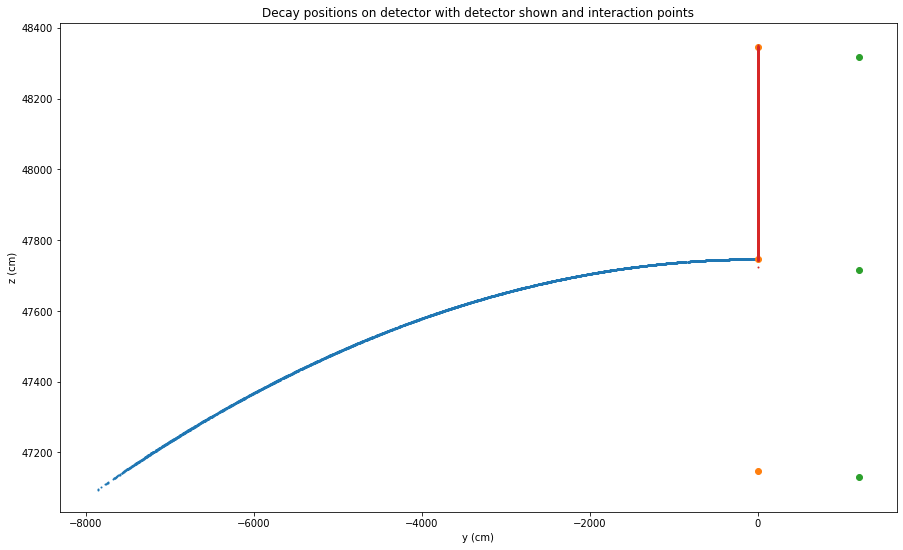

In [18]:
plt.figure(figsize=(15,9))
h = Radius - np.sqrt(Radius**2 - Detector_height**2)
plt.scatter(mdb.pos_at[1,:][mdb.mask_numu], mdb.pos_at[2,:][mdb.mask_numu], s=1)
plt.scatter([0, 0, 0], [Radius + Dimensions_detector[0], Radius, Radius-Dimensions_detector[0]])
plt.scatter([Detector_height, Detector_height, Detector_height], [Radius + Dimensions_detector[0]-h, Radius-h, Radius-Dimensions_detector[0]]-h)
plt.scatter(mdb.int_points[:,0,1,2][mdb.mask_numu], mdb.int_points[:,0,2,2][mdb.mask_numu], s=1)
plt.xlabel("y (cm)")
plt.ylabel("z (cm)")
plt.title("Decay positions on detector with detector shown and interaction points")

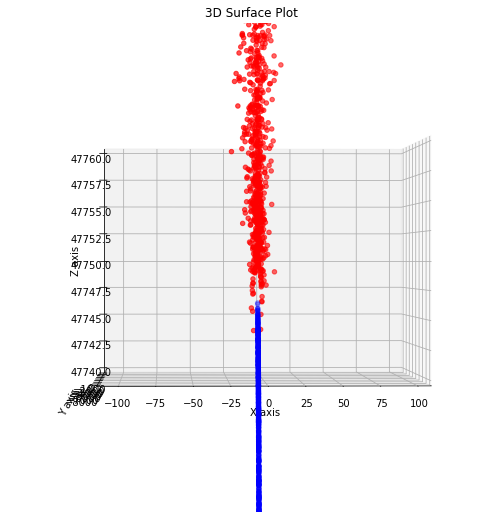

In [19]:

from mpl_toolkits.mplot3d import Axes3D

h = Radius - np.sqrt(Radius**2 - Detector_height**2)



# Create a figure and a 3D axes
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.scatter(mdb.pos_at[0,:][mdb.mask_numu], mdb.pos_at[1,:][mdb.mask_numu], mdb.pos_at[2,:][mdb.mask_numu], color='blue')
ax.scatter(mdb.int_points[:,0,0,2][mdb.mask_numu], mdb.int_points[:,0,1,2][mdb.mask_numu],mdb.int_points[:,0,2,2][mdb.mask_numu], color = 'red')

# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')
ax.set_zlim(47740,47760)
ax.view_init(elev = 0,azim = 268)
plt.ion()
# Show plot
plt.show()

Text(0.5, 1.0, 'Decay positions on detector with detector shown and interaction points')

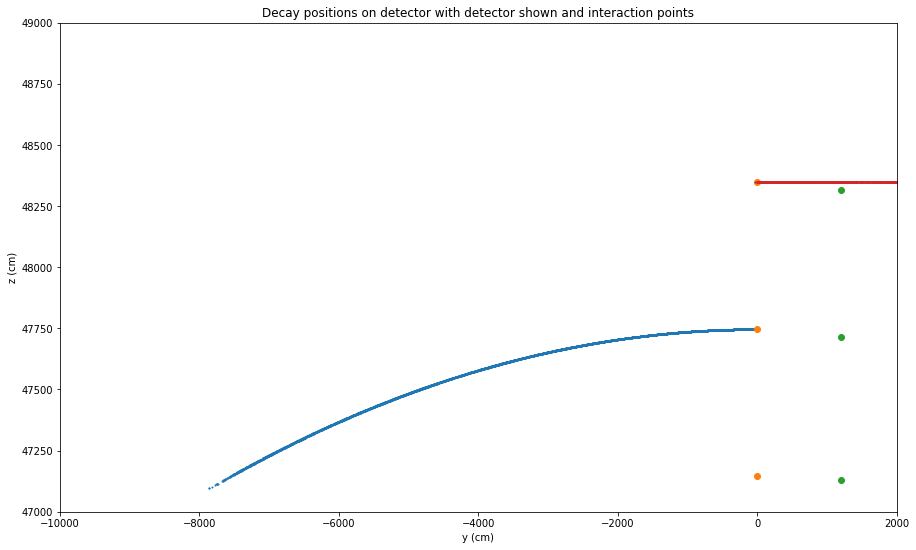

In [21]:
plt.figure(figsize=(15,9))
h = Radius - np.sqrt(Radius**2 - Detector_height**2)
plt.scatter(mdb.pos_at[1,:][mdb.mask_numu], mdb.pos_at[2,:][mdb.mask_numu], s=1)
plt.scatter([0, 0, 0], [Radius + Dimensions_detector[0], Radius, Radius-Dimensions_detector[0]])
plt.scatter([Detector_height, Detector_height, Detector_height], [Radius + Dimensions_detector[0]-h, Radius-h, Radius-Dimensions_detector[0]]-h)
plt.scatter(mdb.int_points[:,1,1,2][mdb.mask_numu], mdb.int_points[:,1,2,2][mdb.mask_numu], s=1)
plt.xlabel("y (cm)")
plt.xlim(-10000, 2000)
plt.ylim(47000, 49000)
plt.ylabel("z (cm)")
plt.title("Decay positions on detector with detector shown and interaction points")

Text(0.5, 1.0, 'Decay positions on detector with detector shown and interaction points')

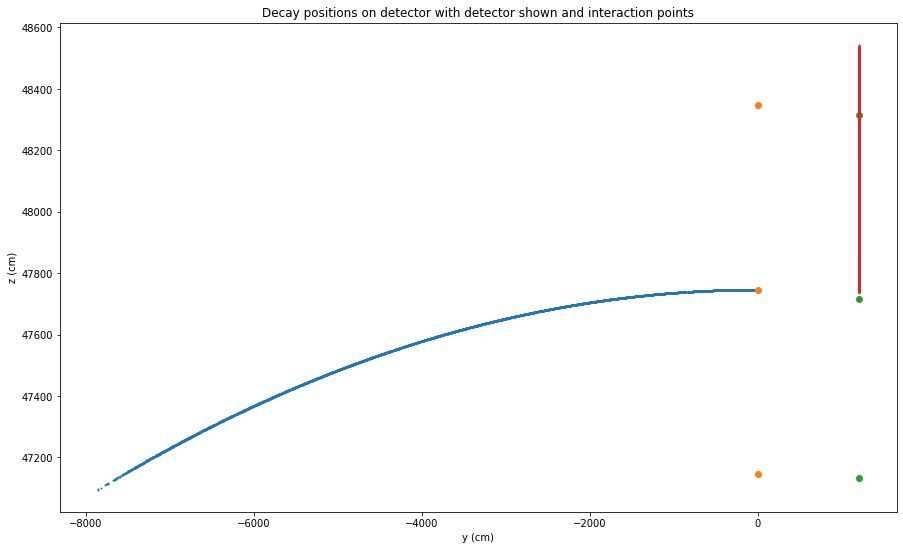

In [23]:
plt.figure(figsize=(15,9))
h = Radius - np.sqrt(Radius**2 - Detector_height**2)
plt.scatter(mdb.pos_at[1,:][mdb.mask_numu], mdb.pos_at[2,:][mdb.mask_numu], s=1)
plt.scatter([0, 0, 0], [Radius + Dimensions_detector[0], Radius, Radius-Dimensions_detector[0]])
plt.scatter([Detector_height, Detector_height, Detector_height], [Radius + Dimensions_detector[0]-h, Radius-h, Radius-Dimensions_detector[0]]-h)
plt.scatter(mdb.int_points[:,2,1,2][mdb.mask_numu], mdb.int_points[:,2,2,2][mdb.mask_numu], s=1)
plt.xlabel("y (cm)")
plt.ylabel("z (cm)")
plt.title("Decay positions on detector with detector shown and interaction points")

Text(0, 0.5, 'Fraction of decay particles')

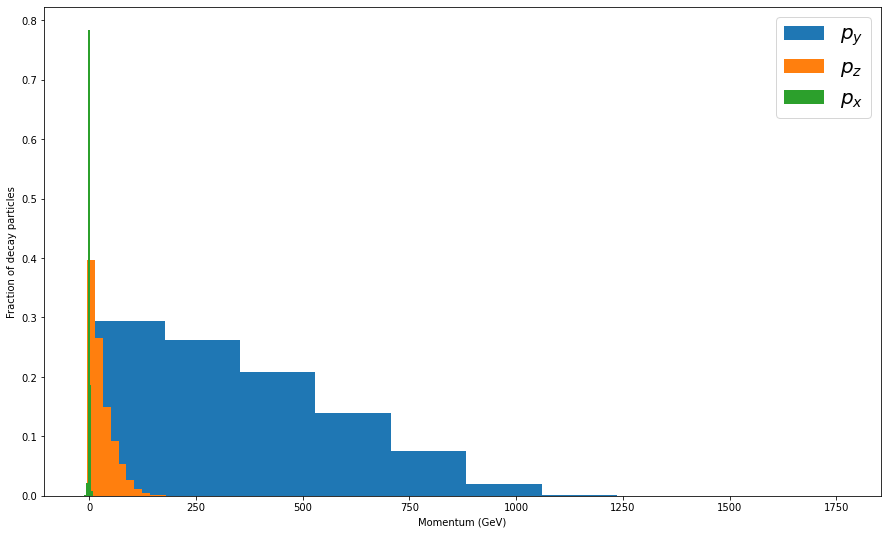

In [24]:
plt.figure(figsize=(15,9))
plt.hist(mdb.pnumu_ar[:,2][mdb.mask_numu],weights = mdb.wnumu_ND/sum(mdb.wnumu_ND), label=r'$p_{y}$')
plt.hist(mdb.pnumu_ar[:,3][mdb.mask_numu],weights = mdb.wnumu_ND/sum(mdb.wnumu_ND), label = r'$p_{z}$')
plt.hist(mdb.pnumu_ar[:, 1][mdb.mask_numu],weights = mdb.wnumu_ND/sum(mdb.wnumu_ND), label=r'$p_{x}$')
plt.legend(loc='best', fontsize ='20')
plt.xlabel("Momentum (GeV)")
plt.ylabel("Fraction of decay particles")

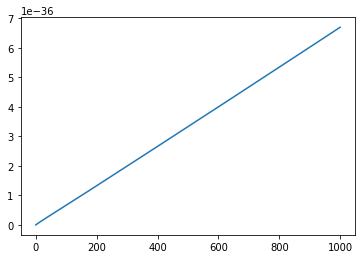

In [8]:
from scipy import interpolate

log10E,sigmae,sigmamu,_,sigmaebar,sigmamubar,_ = np.genfromtxt('xsecs/XCC.dat',unpack=True)
exs = 10**(log10E)
sigmanue = interpolate.interp1d(exs,sigmae*exs*1e-38,bounds_error=False,fill_value=0.0)
sigmanuebar = interpolate.interp1d(exs,sigmaebar*exs*1e-38,bounds_error=False,fill_value=0.0)
sigmanumu = interpolate.interp1d(exs,sigmamu*exs*1e-38,bounds_error=False,fill_value=0.0)
sigmanumubar = interpolate.interp1d(exs,sigmamubar*exs*1e-38,bounds_error=False,fill_value=0.0)

plt.plot(exs, sigmanue(exs))

In [67]:
#Approximation for event rate
Nmu = 1e18
rho = 1.5 #g/cm**3
mn = 939e6 *1.6e-19/(3e8)**2 * 10**3 #g
Ntargets= rho /mn #1/cm**3
h= 10e2 #cm
deltaE_nue = mdb.Enue_ND[1] -mdb.Enue_ND[0]
deltaE_numu = mdb.Enumu_ND[1] - mdb.Enumu_ND[0]
epsilon_nue = mdb.flux_nue_ND_p/np.sum(mdb.flux_nue_ND_p) / deltaE_nue
epsilon_numu = mdb.flux_numu_ND_p/np.sum(mdb.flux_numu_ND_p) / deltaE_numu

dNnue_dE = epsilon_nue * Ntargets*Nmu * h * sigmanue(mdb.Enue_ND)
dNnumu_dE= epsilon_numu * Ntargets *h*Nmu * sigmanumubar(mdb.Enumu_ND)
# SHOULD not multiply by Nmu, but rather by Nmu * acceptance


[0.00000000e+00 1.46130287e+08 2.83189960e+08 4.17881303e+08
 5.51003985e+08 6.86799081e+08 8.24360246e+08 9.61997767e+08
 1.09971173e+09 1.23750203e+09 1.37536872e+09 1.51331171e+09
 1.65133124e+09 1.78942701e+09 1.92759922e+09 2.06584781e+09
 2.20417276e+09 2.34257411e+09 2.48105186e+09 2.61960594e+09
 2.75823616e+09 2.89694319e+09 3.03572645e+09 3.17458589e+09
 3.31352200e+09 3.45253427e+09 3.59162322e+09 3.73078835e+09
 3.87002986e+09 4.00934763e+09 4.14874135e+09 4.28821264e+09
 4.42775890e+09 4.56738295e+09 4.70708282e+09 4.84685881e+09
 4.98671122e+09 5.12664017e+09 5.26664564e+09 5.40672739e+09
 5.54688501e+09 5.68711905e+09            nan 5.96781670e+09
            nan            nan            nan            nan
            nan 0.00000000e+00]
1.0000000000000002


/tmp/ipykernel_922/125625407.py:14: RuntimeWarning: invalid value encountered in true_divide
  print(dNnue_dE/epsilon_nue)


1.7307370450348139e-09
1.303739329492079e-09


(array([  0.,   0.,   0.,   0.,   0., 694.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

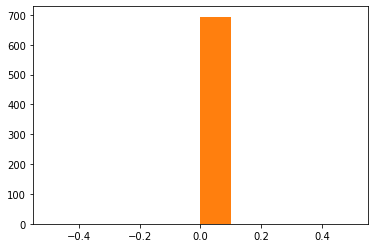

In [37]:
#Real event rate: # interactions from beam
# - how to normalize? Multiplied by the Nmu, times the acceptance gives us total accepted from beam; need to find proportion of those that interact / total emitted, multplied by that nubmer
# - Formula: 
'''
I.R.V = Bern(p) with p = 1 - exp( - n * L * sigma)
Mean; multiply by Nmu * acceptance
'''
from scipy.stats import bernoulli
na_numu = np.sum(mdb.mask_numu)
na_nue = np.sum(mdb.mask_nue)
p_ints_numu = 1 - np.exp( - 1 * Ntargets * mdb.heights[:, 1][mdb.mask_numu] * sigmanumubar(mdb.Enumu)[mdb.mask_numu])
p_ints_nue = 1 - np.exp( - 1 * Ntargets * mdb.heights[:, 1][mdb.mask_nue] * sigmanue(mdb.Enue)[mdb.mask_nue])
#print(p_ints_nue)
print(np.mean(p_ints_nue))
print(np.std(p_ints_nue))
plt.hist(p_ints_nue)
IRV_nue = bernoulli.rvs(p_ints_nue)
plt.hist(IRV_nue)
## Problem; not enough statistics

In [48]:
factors_numu = np.full((1, na_numu),round(Nmu / mdb.sample_size))
factors_nue = np.full((1, na_nue), round(Nmu / mdb.sample_size))

6407732
3772587


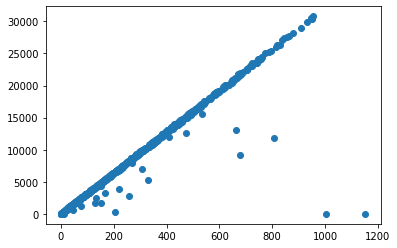

In [72]:
#ACTUAL EVENT NUMBER FROM RAY TRACING

from scipy.stats import binom
na_numu = np.sum(mdb.mask_numu)
na_nue = np.sum(mdb.mask_nue)
earg_numu = - 1 * Ntargets * mdb.heights[:, 1][mdb.mask_numu] * sigmanumubar(mdb.Enumu)[mdb.mask_numu]
earg_nue = - 1 * Ntargets * mdb.heights[:, 1][mdb.mask_nue] * sigmanue(mdb.Enue)[mdb.mask_nue]
p_ints_numu = 1 - np.exp( earg_numu)
p_ints_nue = 1 - np.exp( earg_nue)
#print(p_ints_nue)
#print(np.mean(p_ints_nue))
#print(np.std(p_ints_nue))
#plt.figure(1)
#plt.hist(p_ints_nue)
count_nue = binom.rvs(factors_nue, p_ints_nue)
#plt.figure(2)
#plt.hist(count_nue)
#plt.figure(3)
#plt.scatter(mdb.heights[:,2][mdb.mask_nue], count_nue)
print(sum(count_nue))
#print(earg_nue)
#print(* Ntargets*Nmu * h * sigmanue(mdb.Enue_ND))
count_numu = binom.rvs(factors_numu, p_ints_numu)
print(sum(count_numu))
plt.scatter(mdb.Enue[mdb.mask_nue], count_nue)

Text(0.5, 1.0, 'Events')

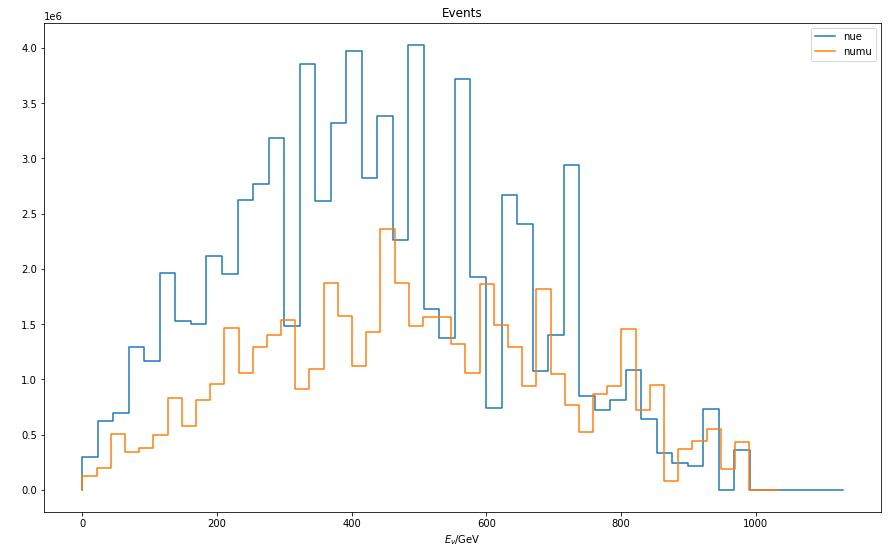

In [10]:
fig, ax = plt.subplots(figsize=(15,9))

ax.step(mdb.Enue_ND,dNnue_dE, label="nue")
ax.step(mdb.Enumu_ND,dNnumu_dE, label="numu")

ax.set_ylabel(" ")
ax.set_xlabel(r'$E_{\nu}/$GeV')
ax.legend()
ax.set_title("Events")

In [71]:
print(sum(dNnue_dE) * (mdb.Enue_ND[1] - mdb.Enue_ND[0]) * mdb.nue_eff_ND)
print(sum(dNnumu_dE) * (mdb.Enue_ND[1] - mdb.Enue_ND[0]) * mdb.numu_eff_ND)

6506303.283158556
4143830.524665482


In [35]:
x = np.array([1,2,3,4,5])
x[(x > 2) & (x<4)]
print(x)
print(x[(x > 2) & (x<4)])

[1 2 3 4 5]
[3]


In [38]:
x= np.array([1,2,3,4])
y = x.reshape((4,1))
y[x>2]**2

array([[ 9],
       [16]])

In [39]:
3*536/55

29.236363636363638